In [100]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins
plt.rcParams['figure.figsize']=10,12
import warnings
warnings.filterwarnings('ignore')

In [101]:
df=pd.read_excel('Covid cases in india.xlsx')
df.copy()
df

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,9,0,0,0
1,2,Bihar,3,0,0,1
2,3,Chhattisgarh,1,0,0,0
3,4,Delhi,30,1,6,1
4,5,Gujarat,32,1,0,1
5,6,Haryana,14,14,11,0
6,7,Himachal Pradesh,3,0,0,1
7,8,Karnataka,41,0,3,1
8,9,Kerala,101,8,4,0
9,10,Madhya Pradesh,9,0,0,0


In [102]:
df.describe()

,S. No.,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,13.000000,20.760000,1.720000,1.640000,0.360000
std,7.359801,26.735245,3.576777,3.212994,0.568624
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,7.000000,3.000000,0.000000,0.000000,0.000000
50%,13.000000,9.000000,0.000000,0.000000,0.000000
75%,19.000000,30.000000,1.000000,1.000000,1.000000
max,25.000000,101.000000,14.000000,11.000000,2.000000


In [103]:
df.shape

(25, 6)

In [104]:
india_coord=pd.read_excel('Indian Coordinates.xlsx')
dbd_India=pd.read_excel('per_day_cases.xlsx',parse_dates=True,sheet_name='India')
dbd_Korea=pd.read_excel('per_day_cases.xlsx',parse_dates=True,sheet_name='Korea')
dbd_Italy=pd.read_excel('per_day_cases.xlsx',parse_dates=True,sheet_name='Italy')
dbd_Wuhan=pd.read_excel('per_day_cases.xlsx',parse_dates=True,sheet_name='Wuhan')

In [105]:
df['Total Cases']=df['Total Confirmed cases (Indian National)']+df['Total Confirmed cases ( Foreign National )']
total_cases=df['Total Cases'].sum()
print('Total number of confirmed COVID 19 cases across India till date(22nd March,20):',total_cases)

Total number of confirmed COVID 19 cases across India till date(22nd March,20): 562


In [106]:
df.style.background_gradient(cmap='Reds')

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases
0,1,Andhra Pradesh,9,0,0,0,9
1,2,Bihar,3,0,0,1,3
2,3,Chhattisgarh,1,0,0,0,1
3,4,Delhi,30,1,6,1,31
4,5,Gujarat,32,1,0,1,33
5,6,Haryana,14,14,11,0,28
6,7,Himachal Pradesh,3,0,0,1,3
7,8,Karnataka,41,0,3,1,41
8,9,Kerala,101,8,4,0,109
9,10,Madhya Pradesh,9,0,0,0,9


In [107]:
df['Total Active'] = df['Total Cases'] - (df['Death'] + df['Cured'])
total_active = df['Total Active'].sum()
print('Total number of active COVID 2019 cases across India:', total_active)
Tot_Cases = df.groupby('Name of State / UT')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

Total number of active COVID 2019 cases across India: 512


,Total Active
Name of State / UT,
Kerala,105
Maharashtra,99
Karnataka,37
Telengana,34
Gujarat,32
Rajasthan,29
Punjab,28
Uttar Pradesh,24
Delhi,24


In [128]:
df_full=pd.merge(india_coord,df,on="Name of State / UT")
map=folium.Map(location=[20,70],zoom_start=4,tiles='Stamenterrain')
for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Total Cases'], df_full['Name of State / UT']):
    folium.CircleMarker([lat, lon], radius=value*0.8, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

KeyError: 'State/UT'

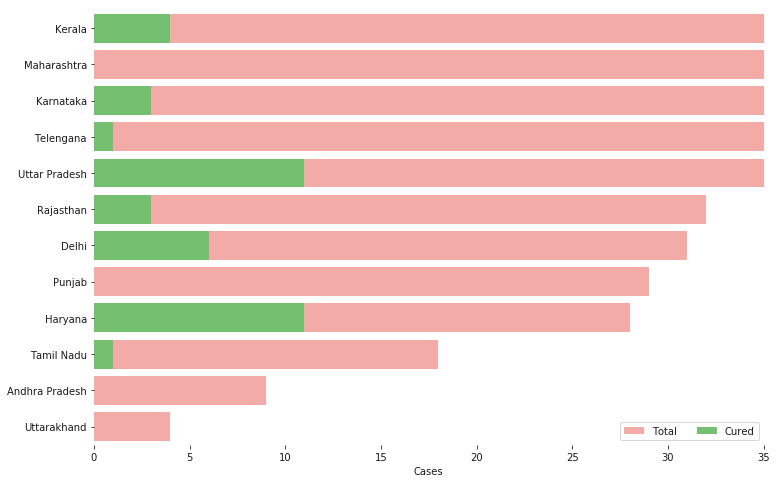

In [109]:
f,ax=plt.subplots(figsize=(12,8))
data=df_full[['Name of State / UT','Total Cases','Cured','Death']]
data.sort_values('Total Cases',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x='Total Cases',y='Name of State / UT',data=data,label="Total",color='r')
sns.set_color_codes('muted')
sns.barplot(x='Cured',y='Name of State / UT',data=data,label='Cured',color='g')
ax.legend(ncol=2,loc='lower right',frameon=True)
ax.set(xlim=(0,35),ylabel="",xlabel='Cases')
sns.despine(left=True,bottom=True)

In [110]:
import plotly 

In [111]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=dbd_India['Date'],y=dbd_India['Total Cases'],mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative Cases)',plot_bgcolor='rgb(230,230,230)')
fig.show()

fig=px.bar(dbd_India,x='Date',y='New Cases',barmode='group',height=400)
fig.update_layout(title_text='Coronavirus cases in India on daily basis',plot_bgcolor='rgb(230,230,230)')
fig.show()

In [112]:
fig=px.bar(dbd_India,x='Date',y='Total Cases',color='Total Cases',orientation='v',height=600,title='Confirmed Cases in India',color_discrete_sequence=px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()
fig=px.bar(dbd_Korea,x='Date',y='Total Cases',color='Total Cases',orientation='v',height=600,title='Confirmed Cases in Korea',color_discrete_sequence=px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()
fig=px.bar(dbd_Italy,x='Date',y='Total Cases',color='Total Cases',orientation='v',height=600,title='Confirmed Cases in Italy',color_discrete_sequence=px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()
fig=px.bar(dbd_Wuhan,x='Date',y='Total Cases',color='Total Cases',orientation='v',height=600,title='Confirmed Cases in Wuhan',color_discrete_sequence=px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

In [113]:
from plotly.subplots import make_subplots
fig=make_subplots(
rows=2, cols=2,
specs=[[{},{}],
      [{"colspan":2},None]],
subplot_titles=('S.Korea','India','Italy','Wuhan'))
fig.add_trace(go.Bar(x=dbd_Korea['Date'], y=dbd_Korea['Total Cases'],
                    marker=dict(color=dbd_Korea['Total Cases'], coloraxis="coloraxis")),1, 1)

fig.add_trace(go.Bar(x=dbd_Italy['Date'], y=dbd_Italy['Total Cases'],
                    marker=dict(color=dbd_Italy['Total Cases'], coloraxis="coloraxis")),1, 2)

fig.add_trace(go.Bar(x=dbd_India['Date'], y=dbd_India['Total Cases'],
                    marker=dict(color=dbd_India['Total Cases'], coloraxis="coloraxis")),2, 1)

#fig.add_trace(go.Bar(x=dbd_Wuhan['Date'], y=dbd_Wuhan['Total Cases'],
 #                   marker=dict(color=dbd_Wuhan['Total Cases'], coloraxis="coloraxis")),2, 2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Total Confirmed cases(Cumulative)")

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [114]:
title='Main source for News'
labels=['s.Korea','Italy','India']
colors=['rgb(122,128,0)','rgb(255,0,0)','rgb(49,130,189)']

mode_size=[10,10,12]
line_size=[1,1,8]
fig=go.Figure()

fig.add_trace(go.Scatter(x=dbd_Korea['Days after surpassing 100 cases'],
                        y=dbd_Korea['Total Cases'],mode='lines',
                        name=labels[0],
                        line=dict(color=colors[0],width=line_size[0]),connectgaps=True))
fig.add_trace(go.Scatter(x=dbd_Italy['Days after surpassing 100 cases'], 
                 y=dbd_Italy['Total Cases'],mode='lines',
                 name=labels[1],
                 line=dict(color=colors[1], width=line_size[1]),            
                 connectgaps=True))

fig.add_trace(go.Scatter(x=dbd_India['Days after surpassing 100 cases'], 
                 y=dbd_India['Total Cases'],mode='lines',
                 name=labels[2],
                 line=dict(color=colors[2], width=line_size[2]),            
                 connectgaps=True))
    
    
    
annotations = []

annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Days after crossing 100 cases ',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))

fig.update_layout(annotations=annotations,plot_bgcolor='white',yaxis_title='Cumulative cases')

fig.show()

In [115]:
df=pd.read_csv('covid_19_clean_complete.csv',parse_dates=['Date'])
df.rename(columns={'ObservationDate':'Date','Country/Region':'Country'},inplace=True)
df_confirmed=pd.read_csv('time_series_covid19_confirmed_global.csv')
df_recovered=pd.read_csv('time_series_covid19_recovered_global.csv')
df_deaths=pd.read_csv('time_series_covid19_deaths_global.csv')

df_confirmed.rename(columns={'Country/Region':'Country'},inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'},inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'},inplace=True)

In [116]:
df.head()

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0


In [117]:
df2 = df.groupby(["Date", "Country", "Province/State"])[['Date', 'Province/State', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
df2.head()

,Date,Country,Province/State,Confirmed,Deaths,Recovered
0,2020-01-22,Australia,Australian Capital Territory,0.0,0.0,0.0
1,2020-01-22,Australia,From Diamond Princess,0.0,0.0,0.0
2,2020-01-22,Australia,New South Wales,0.0,0.0,0.0
3,2020-01-22,Australia,Northern Territory,0.0,0.0,0.0
4,2020-01-22,Australia,Queensland,0.0,0.0,0.0


In [118]:
df.query('Country=="India"').groupby("Date")[['Confirmed','Deaths','Recovered']].sum().reset_index()

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0
5,2020-01-27,0.0,0.0,0.0
6,2020-01-28,0.0,0.0,0.0
7,2020-01-29,0.0,0.0,0.0
8,2020-01-30,1.0,0.0,0.0
9,2020-01-31,1.0,0.0,0.0


In [119]:
df.groupby('Date').sum().head()

,Lat,Long,Confirmed,Deaths,Recovered
Date,,,,,
2020-01-22,7777.4793,1639.7021,554.0,17.0,28.0
2020-01-23,7777.4793,1639.7021,652.0,18.0,30.0
2020-01-24,7777.4793,1639.7021,939.0,26.0,36.0
2020-01-25,7777.4793,1639.7021,1432.0,42.0,39.0
2020-01-26,7777.4793,1639.7021,2113.0,56.0,52.0


In [120]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [121]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths['Date'], y=deaths['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='Worldwide NCOVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

fig.show()

In [122]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [123]:
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [124]:
confirmed.tail()

,ds,y
57,2020-03-19,242708.0
58,2020-03-20,272166.0
59,2020-03-21,304524.0
60,2020-03-22,335955.0
61,2020-03-23,336004.0


In [125]:
from holidays import WEEKEND, HolidayBase
from dateutil.easter import easter
from dateutil.relativedelta import relativedelta as rd


In [126]:
from fbprophet import Prophet

ImportError: cannot import name 'easter'